# WATER POTABILITY CLASSIFICATION

## Load Data

In [135]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("dark_background")
from sklearn import metrics

In [136]:
df = pd.read_csv('water_potability.csv')
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


## EDA

In [137]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [138]:
df['ph'] = df['ph'].fillna(df['ph'].mean())
df['Sulfate'] = df['Sulfate'].fillna(df['Sulfate'].mean())
df['Trihalomethanes'] = df['Trihalomethanes'].fillna(df['Trihalomethanes'].mean())

In [139]:
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [140]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.469956,32.879761,8768.570828,1.583085,36.142612,80.824064,3.308162,15.769881,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.277673,176.850538,15666.690297,6.127421,317.094638,365.734414,12.065801,56.647656,3.439711,0.000000
50%,7.080795,196.967627,20927.833607,7.130299,333.775777,421.884968,14.218338,66.396293,3.955028,0.000000
75%,7.870050,216.667456,27332.762127,8.114887,350.385756,481.792304,16.557652,76.666609,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [141]:
df['Potability'].value_counts()

0    1998
1    1278
Name: Potability, dtype: int64

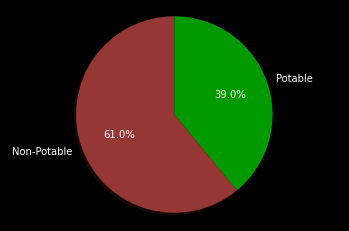

In [142]:
labels = 'Non-Potable', 'Potable'
sizes = df['Potability'].value_counts()
color = ['#953734', '#009900']

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, colors = color)
ax1.axis('equal')

plt.show()

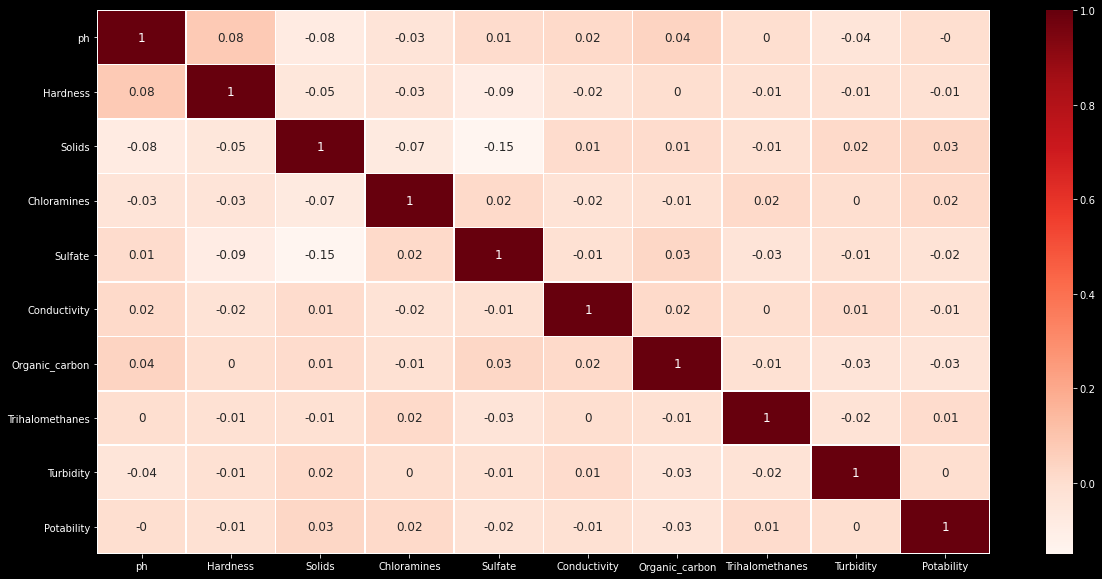

In [143]:
plt.figure(figsize = (20,10))
sns.heatmap(data=df.corr().round(2), linewidths=.5, annot=True, annot_kws={"size":12}, cmap = 'Reds')
plt.show()

array([[<AxesSubplot:title={'center':'ph'}>,
        <AxesSubplot:title={'center':'Hardness'}>,
        <AxesSubplot:title={'center':'Solids'}>],
       [<AxesSubplot:title={'center':'Chloramines'}>,
        <AxesSubplot:title={'center':'Sulfate'}>,
        <AxesSubplot:title={'center':'Conductivity'}>],
       [<AxesSubplot:title={'center':'Organic_carbon'}>,
        <AxesSubplot:title={'center':'Trihalomethanes'}>,
        <AxesSubplot:title={'center':'Turbidity'}>],
       [<AxesSubplot:title={'center':'Potability'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

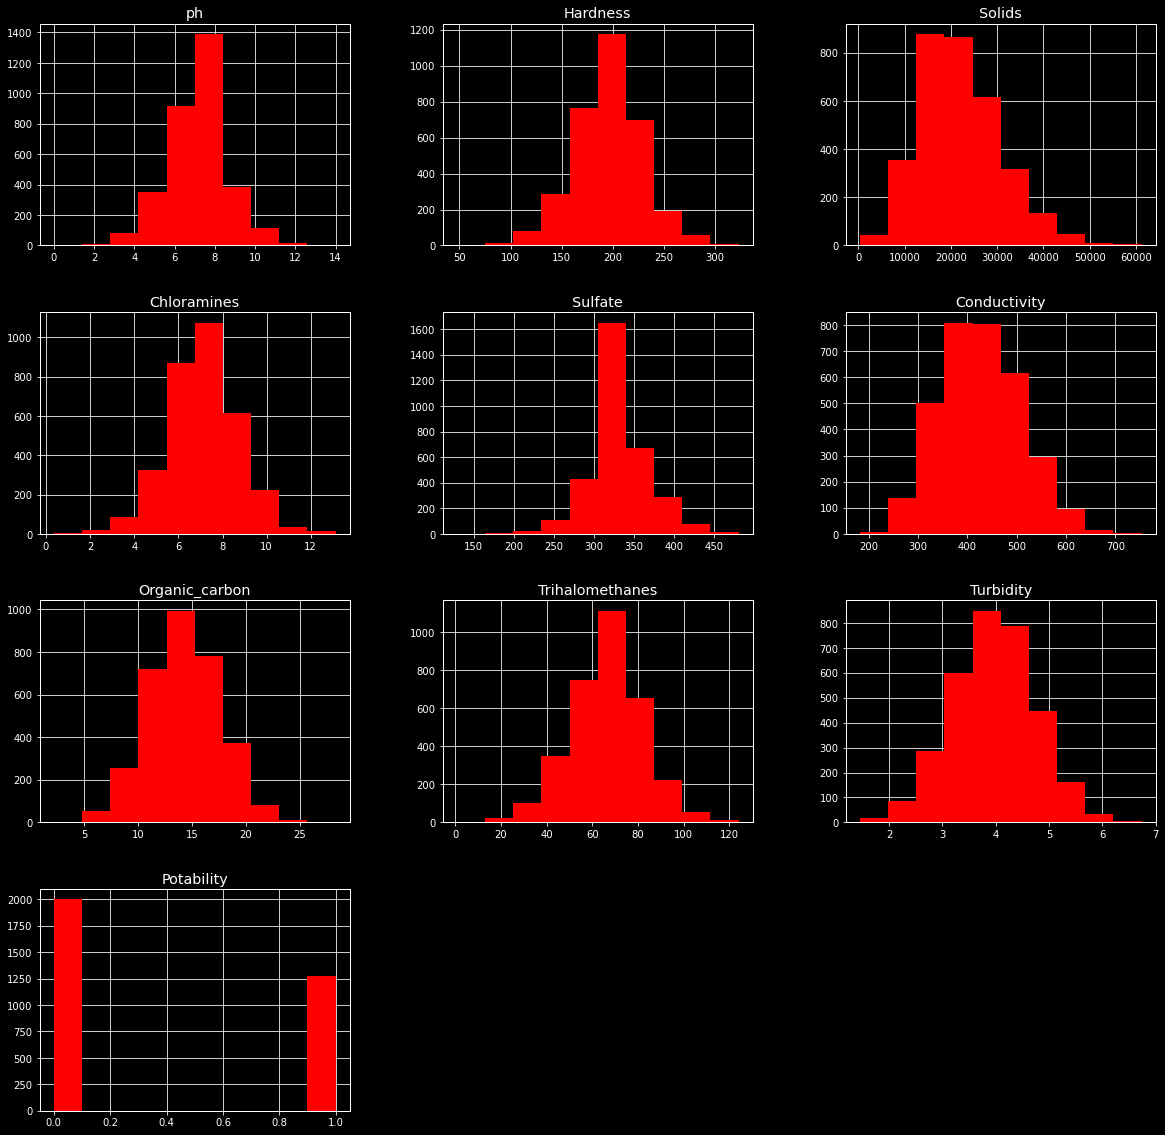

In [144]:
df.hist(figsize=(20,20), color = 'red')

## Data Preparation

In [145]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df_scaled = pd.DataFrame(scaler.fit_transform(df), columns = df.columns)
df_scaled.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,-1.027333e-14,0.259195,-0.139471,0.112415,0.961357,1.708954,-1.180651,1.306149,-1.286298,-0.799775
1,-2.289339e+00,-2.036414,-0.385987,-0.307694,0.000000,2.062575,0.270597,-0.638480,0.684218,-0.799775
2,6.928678e-01,0.847665,-0.240047,1.360594,0.000000,-0.094032,0.781117,0.001509,-1.167365,-0.799775
3,8.409504e-01,0.547651,0.000493,0.592008,0.639519,-0.778830,1.255134,2.152874,0.848412,-0.799775
4,1.368569e+00,-0.464429,-0.460249,-0.363698,-0.654177,-0.343939,-0.824357,-2.181599,0.138786,-0.799775


In [146]:
X = df_scaled.drop(['Potability'], axis = 1)
y = df['Potability']

X.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,-1.027333e-14,0.259195,-0.139471,0.112415,0.961357,1.708954,-1.180651,1.306149,-1.286298
1,-2.289339e+00,-2.036414,-0.385987,-0.307694,0.000000,2.062575,0.270597,-0.638480,0.684218
2,6.928678e-01,0.847665,-0.240047,1.360594,0.000000,-0.094032,0.781117,0.001509,-1.167365
3,8.409504e-01,0.547651,0.000493,0.592008,0.639519,-0.778830,1.255134,2.152874,0.848412
4,1.368569e+00,-0.464429,-0.460249,-0.363698,-0.654177,-0.343939,-0.824357,-2.181599,0.138786


In [147]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                   test_size = 0.15)
print(X_train.shape, X_test.shape)

(2784, 9) (492, 9)


## Classification

### KNeighborsClassifier

In [148]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=5)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.78      0.72       302
           1       0.54      0.41      0.47       190

    accuracy                           0.64       492
   macro avg       0.61      0.59      0.59       492
weighted avg       0.62      0.64      0.62       492

[[235  67]
 [112  78]]


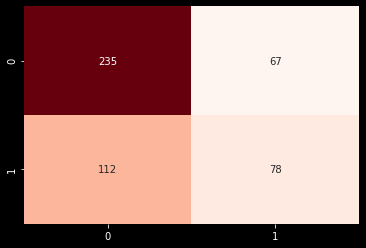

In [149]:
import seaborn as sns
#plt.style.use('ggplot')
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap="Reds", cbar=False);

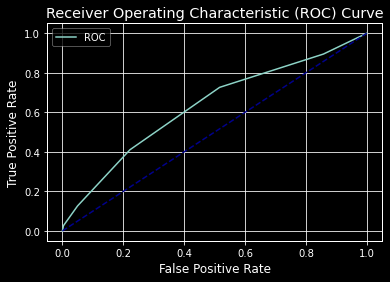

AUC: 0.63


In [150]:
y_pred = model.predict(X_test)
y_probs = model.predict_proba(X_test)
fpr, tpr, thresholds=metrics.roc_curve(y_test,  y_probs[:,1])

plt.plot(fpr, tpr, label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

from sklearn import metrics
auc = metrics.roc_auc_score(y_test, y_probs[:,1])
print('AUC: %.2f' % auc)

### GaussianNB

In [151]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()

model.fit(X_train, y_train)
y_pred=model.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.64      0.90      0.75       302
           1       0.55      0.19      0.28       190

    accuracy                           0.63       492
   macro avg       0.59      0.55      0.51       492
weighted avg       0.60      0.63      0.57       492

[[272  30]
 [154  36]]


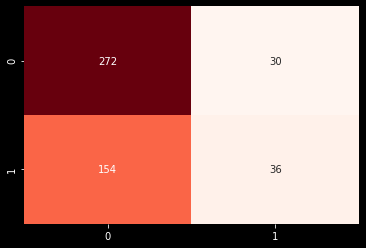

In [152]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap="Reds", cbar=False);

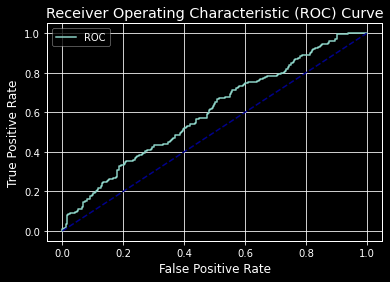

AUC: 0.60


In [153]:
y_pred = model.predict(X_test)
y_probs = model.predict_proba(X_test)
fpr, tpr, thresholds=metrics.roc_curve(y_test,  y_probs[:,1])

plt.plot(fpr, tpr, label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

from sklearn import metrics
auc = metrics.roc_auc_score(y_test, y_probs[:,1])
print('AUC: %.2f' % auc)

### MLPClassifier

In [154]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier(max_iter= 100, alpha= 0.1, hidden_layer_sizes = 100)

model.fit(X_train, y_train)
y_pred=model.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.86      0.76       302
           1       0.60      0.33      0.42       190

    accuracy                           0.66       492
   macro avg       0.64      0.60      0.59       492
weighted avg       0.64      0.66      0.63       492

[[261  41]
 [128  62]]


C:\Users\damianiv\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


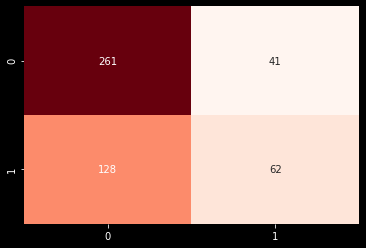

In [155]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap="Reds", cbar=False);

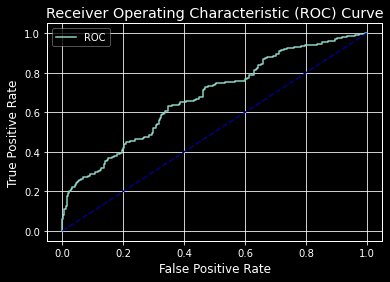

AUC: 0.68


In [156]:
y_pred = model.predict(X_test)
y_probs = model.predict_proba(X_test)
fpr, tpr, thresholds=metrics.roc_curve(y_test,  y_probs[:,1])

plt.plot(fpr, tpr, label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

from sklearn import metrics
auc = metrics.roc_auc_score(y_test, y_probs[:,1])
print('AUC: %.2f' % auc)